<a href="https://colab.research.google.com/github/ishara-bangkit-capstone-project/ishara-machine-learning/blob/main/fix/notebooks/multiclass_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data from Kaggle to further processing it

In [ ]:
! pip install kaggle

In [ ]:
!pip install tflite-support

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 23.7 MB/s eta 0:00:00


In [ ]:
# Install dependencies
!pip install visualkeras
!pip install pydot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 5.9 MB/s eta 0:00:00


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download -d agungmrf/indonesian-sign-language-bisindo

Dataset URL: https://www.kaggle.com/datasets/agungmrf/indonesian-sign-language-bisindo
License(s): unknown
100% 1.36G/1.36G [01:24<00:00, 19.6MB/s]
100% 1.36G/1.36G [01:25<00:00, 17.2MB/s]


#Importing the Necessary Library


In [ ]:
# Import Data Science Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from PIL import Image
%matplotlib inline

# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model
from tensorflow.keras.layers.experimental import preprocessing

# System libraries
from pathlib import Path
import matplotlib.image as mpimg
import zipfile, os

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model

import datetime
import pathlib
import flatbuffers
import platform
from tensorflow_lite_support.metadata import metadata_schema_py_generated as _metadata_fb
from tensorflow_lite_support.metadata import schema_py_generated
from tensorflow_lite_support.metadata.python import metadata as _metadata
from tensorflow_lite_support.metadata.python import metadata_writers

# Exctracting the Picture Data from kaggle


In [ ]:
# Specify the ZIP file name and extraction directory
local_zip = '/content/indonesian-sign-language-bisindo.zip'
extract_dir = '/content/bisindo'

# Extract the ZIP file
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


# Load and Transfrom Data

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)

In [ ]:
# Unpacking the the extracting data and putting it in list
data_dir = '/content/bisindo'
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
# Walk through each directory
walk_through_dir(data_dir)

There are 1 directories and 0 images in '/content/bisindo'.
There are 2 directories and 0 images in '/content/bisindo/bisindo'.
There are 2 directories and 0 images in '/content/bisindo/bisindo/images'.
There are 26 directories and 0 images in '/content/bisindo/bisindo/images/train'.
There are 0 directories and 360 images in '/content/bisindo/bisindo/images/train/T'.
There are 0 directories and 357 images in '/content/bisindo/bisindo/images/train/V'.
There are 0 directories and 360 images in '/content/bisindo/bisindo/images/train/J'.
There are 0 directories and 328 images in '/content/bisindo/bisindo/images/train/Y'.
There are 0 directories and 357 images in '/content/bisindo/bisindo/images/train/F'.
There are 0 directories and 360 images in '/content/bisindo/bisindo/images/train/G'.
There are 0 directories and 348 images in '/content/bisindo/bisindo/images/train/H'.
There are 0 directories and 355 images in '/content/bisindo/bisindo/images/train/M'.
There are 0 directories and 357 ima

In [ ]:
# Create a list to store image paths and labels
images = []
labels = []

# Iterate through each directory and file
for path, subdirs, files in os.walk(data_dir):
    for name in files:
        if name.endswith(('jpg', 'jpeg', 'png')):  # Make sure only image files are included
            images.append(os.path.join(path, name))
            labels.append(path.split('/')[-2])  # Take the parent directory name as the label

# Change list to DataFrame
df = pd.DataFrame({
    "file_path": images,
    "file_name": [os.path.basename(image) for image in images],
    "label": [os.path.split(os.path.split(image)[0])[1] for image in images]  # Mengambil label dari path
})

# Display some results to verify
print(f"Total images: {len(images)}")
print(f"First 10 image paths: {images[:10]}")
print(f"First 10 labels: {df['label'][:10].tolist()}")


Total images: 11470
First 10 image paths: ['/content/bisindo/bisindo/images/train/T/image_16.jpg', '/content/bisindo/bisindo/images/train/T/image_19.jpg', '/content/bisindo/bisindo/images/train/T/flip057.jpg', '/content/bisindo/bisindo/images/train/T/flip070.jpg', '/content/bisindo/bisindo/images/train/T/rotate119.jpg', '/content/bisindo/bisindo/images/train/T/flip058.jpg', '/content/bisindo/bisindo/images/train/T/flip091.jpg', '/content/bisindo/bisindo/images/train/T/rotate141.jpg', '/content/bisindo/bisindo/images/train/T/augmented_image_30.jpg', '/content/bisindo/bisindo/images/train/T/image_9.jpg']
First 10 labels: ['T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T']


In [ ]:
df.head()

file_path      file_name label
0  /content/bisindo/bisindo/images/train/T/image_...   image_16.jpg     T
1  /content/bisindo/bisindo/images/train/T/image_...   image_19.jpg     T
2  /content/bisindo/bisindo/images/train/T/flip05...    flip057.jpg     T
3  /content/bisindo/bisindo/images/train/T/flip07...    flip070.jpg     T
4  /content/bisindo/bisindo/images/train/T/rotate...  rotate119.jpg     T

In [ ]:
# Checking the Distribution of Data from Tag
df.groupby(['label']).size()

label
A    438
B    439
C    429
D    435
E    441
F    447
G    450
H    435
I    450
J    450
K    435
L    447
M    444
N    438
O    447
P    447
Q    435
R    438
S    429
T    450
U    444
V    447
W    450
X    444
Y    411
Z    450
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11470 entries, 0 to 11469
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_path  11470 non-null  object
 1   file_name  11470 non-null  object
 2   label      11470 non-null  object
dtypes: object(3)
memory usage: 269.0+ KB


# Visualizing Images from Dataset

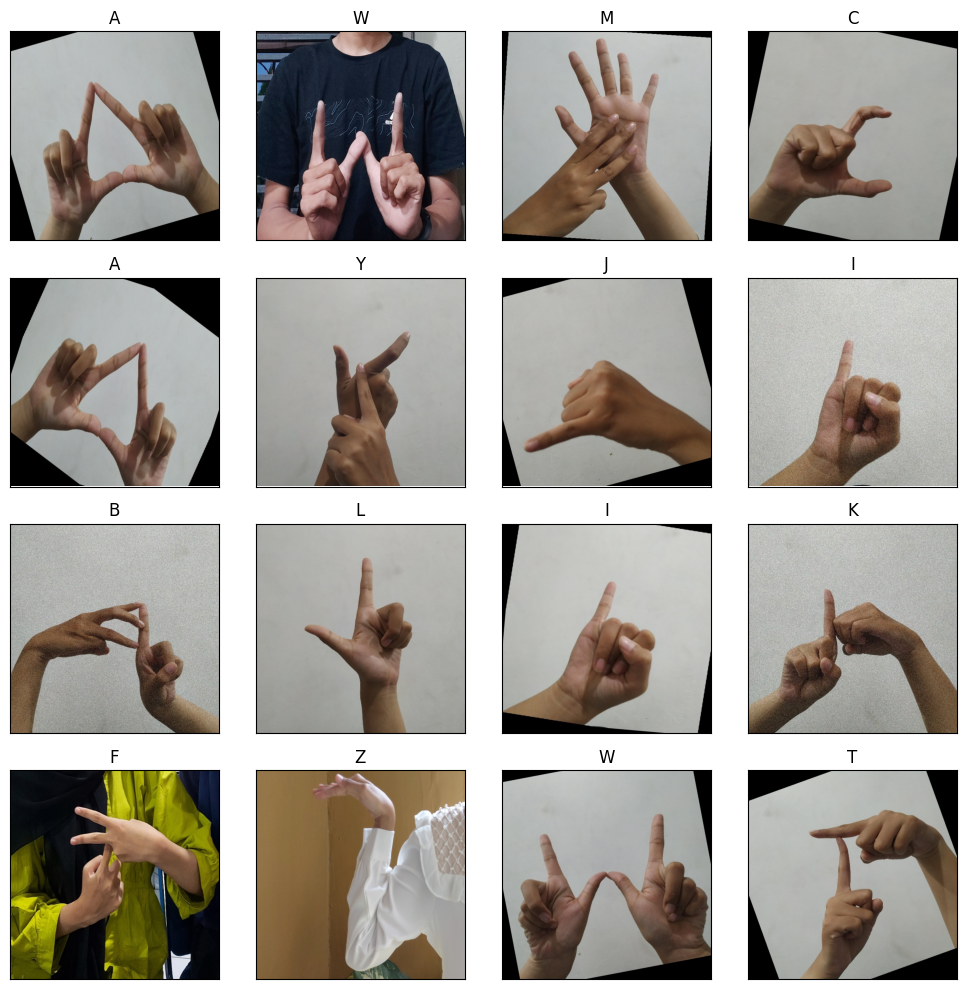

In [ ]:
# Display 16 picture of the dataset with their labels
random_index = np.random.randint(0, len(df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    image = Image.open(df.file_path[random_index[i]])
    ax.imshow(image)
    ax.set_title(df.label[random_index[i]])
plt.tight_layout()
plt.show()


# Data Preprocessing

In [ ]:
# Separate in train and test data
train_df, test_df = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [ ]:
# Split the data into three categories.
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='file_path',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='file_path',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='file_path',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 7341 validated image filenames belonging to 26 classes.
Found 1835 validated image filenames belonging to 26 classes.
Found 2294 validated image filenames belonging to 26 classes.


In [ ]:
# Resize and Rescale Layer
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(224,224),
  layers.experimental.preprocessing.Rescaling(1./255),
])

# Pretrained Model



*   Batch size = 32
*   Epoch = 100
*   Input Shape  = (224, 224, 3)





In [ ]:
# Load the pretained model
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

9406464/9406464 [==============================] - 2s 0us/step


In [ ]:
# Create checkpoint callback
checkpoint_path = "model_checkpoint"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=True,
                                      monitor="val_accuracy",
                                      save_best_only=True)

In [ ]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True) # if val loss decreases for 3 epochs in a row, stop training

Optimizers = Adam

In [ ]:
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

Functional API

In [ ]:
inputs = pretrained_model.input
x = resize_and_rescale(inputs)

x = Dense(256, activation='relu')(pretrained_model.output)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)


# Change the number of units in the last output layer
outputs = Dense(26, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(
    optimizer=Adam(0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# training model
history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=val_images,
    validation_steps=len(val_images),
    epochs=100,
    callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs", "bisindo"),
        checkpoint_callback,
    ]
)

Saving TensorBoard log files to: training_logs/bisindo/20240620-233155
Epoch 1/100
230/230 [==============================] - 55s 208ms/step - loss: 2.5050 - accuracy: 0.3647 - val_loss: 1.4731 - val_accuracy: 0.7330
Epoch 2/100
230/230 [==============================] - 45s 195ms/step - loss: 1.2330 - accuracy: 0.7085 - val_loss: 0.8071 - val_accuracy: 0.8060
Epoch 3/100
230/230 [==============================] - 45s 197ms/step - loss: 0.7983 - accuracy: 0.7898 - val_loss: 0.6287 - val_accuracy: 0.8420
Epoch 4/100
230/230 [==============================] - 46s 201ms/step - loss: 0.6123 - accuracy: 0.8333 - val_loss: 0.5200 - val_accuracy: 0.8583
Epoch 5/100
230/230 [==============================] - 46s 198ms/step - loss: 0.4948 - accuracy: 0.8638 - val_loss: 0.4475 - val_accuracy: 0.8768
Epoch 6/100
230/230 [==============================] - 44s 192ms/step - loss: 0.4012 - accuracy: 0.8873 - val_loss: 0.3886 - val_accuracy: 0.8916
Epoch 7/100
230/230 [==============================] 

In [ ]:
# Display the model summary
print("Model summary:")
model.summary()

Model summary:
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.14791
Test Accuracy: 95.86%


In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


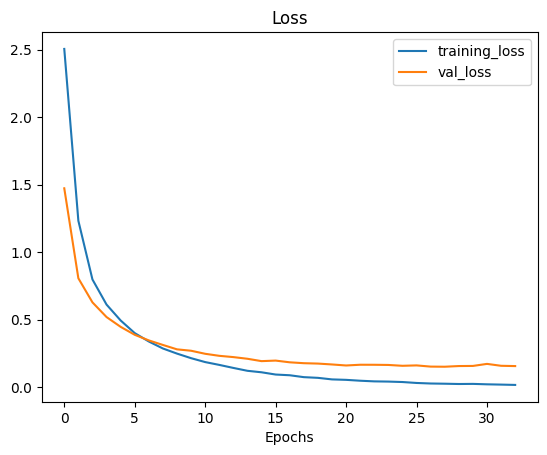

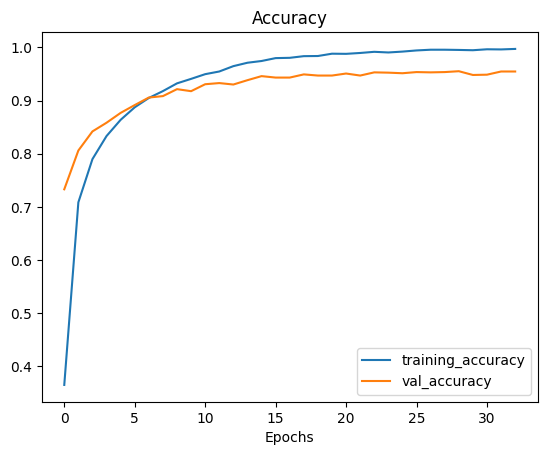

In [ ]:
plot_loss_curves(history)

# Making Prediction on Test Data

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

72/72 [==============================] - 12s 160ms/step
The first 5 predictions: ['J', 'W', 'T', 'L', 'C']


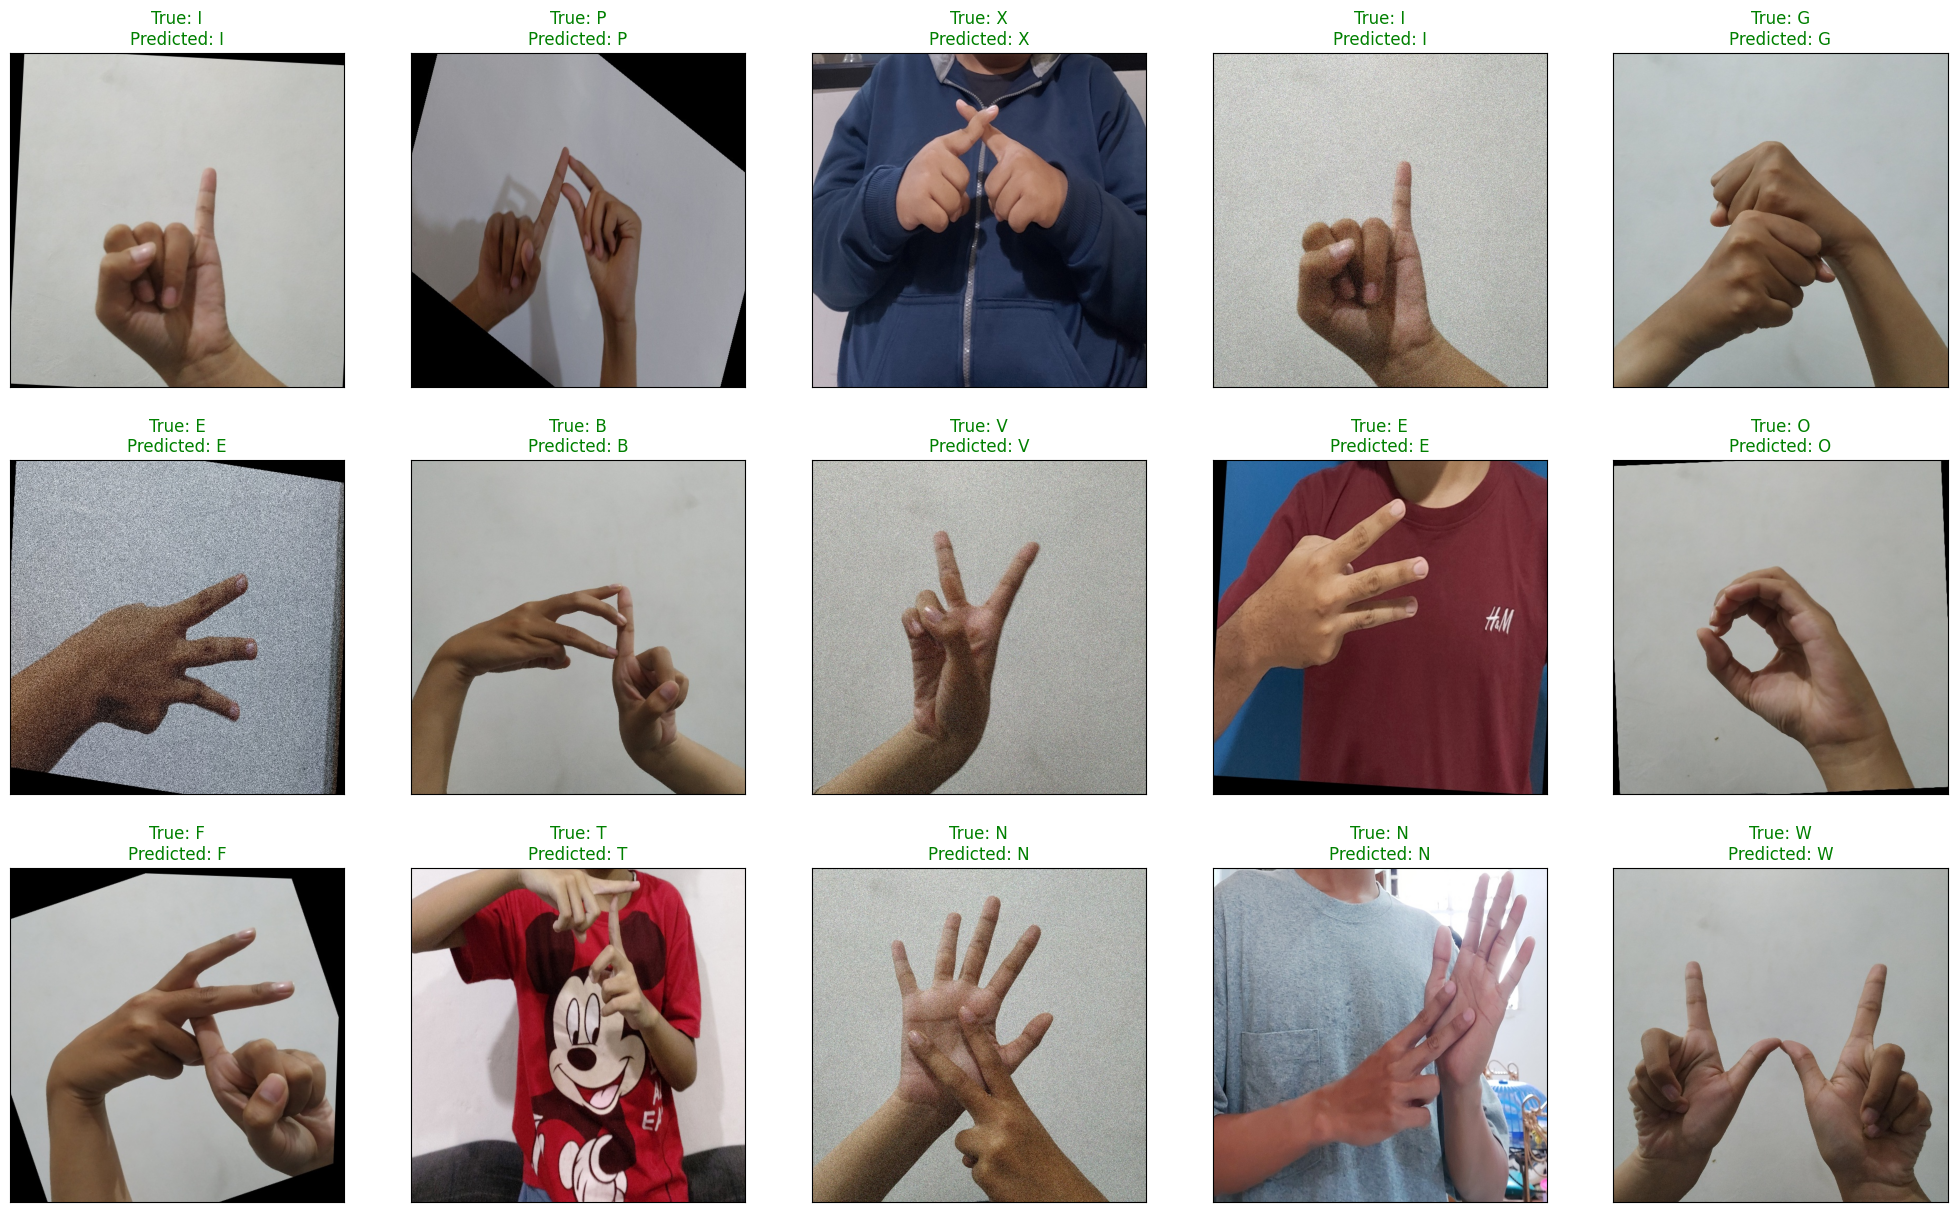

<Figure size 640x480 with 0 Axes>

In [ ]:
 # Display 25 random pictures from the dataset with their labels
random_index = np.random.randint(0, len(test_df) - 1, 15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    image = Image.open(test_df.file_path.iloc[random_index[i]])
    ax.imshow(image)
    if test_df.label.iloc[random_index[i]] == pred[random_index[i]]:
      color = "green"
    else:
      color = "red"
    ax.set_title(f"True: {test_df.label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}", color=color)
plt.show()
plt.tight_layout()

# Plotting the Classification Reports and Confusion Matrix

In [ ]:
y_test = list(test_df.label)
report = classification_report(y_test, pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df

precision    recall  f1-score      support
A              1.000000  0.975904  0.987805    83.000000
B              0.988372  0.955056  0.971429    89.000000
C              0.903614  0.961538  0.931677    78.000000
D              0.976471  0.902174  0.937853    92.000000
E              0.956044  1.000000  0.977528    87.000000
F              0.930693  0.969072  0.949495    97.000000
G              0.975309  0.951807  0.963415    83.000000
H              0.947917  0.938144  0.943005    97.000000
I              0.943820  0.954545  0.949153    88.000000
J              0.932584  0.976471  0.954023    85.000000
K              0.975904  0.931034  0.952941    87.000000
L              0.980000  0.951456  0.965517   103.000000
M              0.912088  0.932584  0.922222    89.000000
N              0.935484  0.935484  0.935484    93.000000
O              1.000000  1.000000  1.000000    83.000000
P              0.912500  0.960526  0.935897    76.000000
Q              0.901235  0.973333  0.935897    75.000000
R              1.000000  0.925532  0.961326    94.000000
S              0.952941  0.931034  0.941860    87.000000
T              0.902913  0.958763  0.930000    97.000000
U              0.987342  0.928571  0.957055    84.000000
V              0.957447  0.978261  0.967742    92.000000
W              1.000000  0.989247  0.994595    93.000000
X              0.978022  0.978022  0.978022    91.000000
Y              0.987500  0.975309  0.981366    81.000000
Z              1.000000  1.000000  1.000000    90.000000
accuracy       0.958588  0.958588  0.958588     0.958588
macro avg      0.959161  0.958995  0.958666  2294.000000
weighted avg   0.959642  0.958588  0.958709  2294.000000

In [ ]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(15, 7), text_size=10, norm=False, savefig=False):
  # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
    plt.xticks(rotation=90, fontsize=text_size)
    plt.yticks(fontsize=text_size)

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if norm:
            plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)
        else:
            plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
                     size=text_size)

  # Save the figure to the current working directory
    if savefig:
        fig.savefig("confusion_matrix.png")

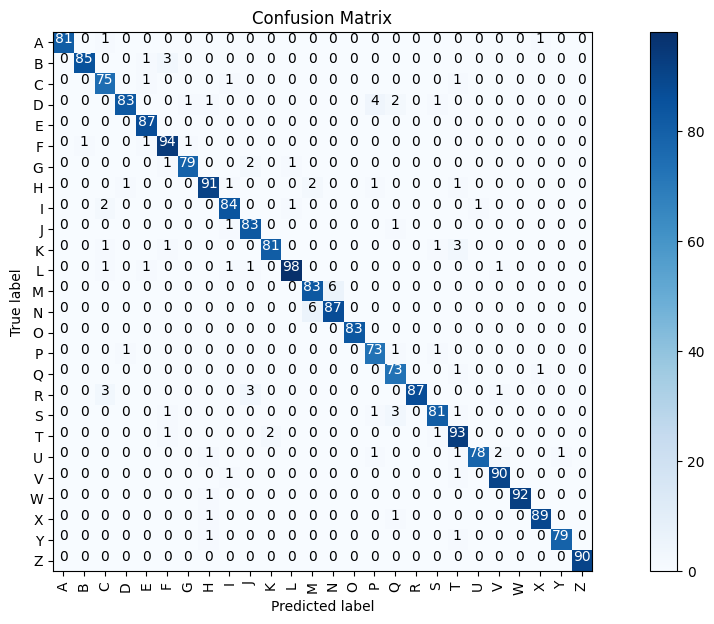

In [ ]:
make_confusion_matrix(y_test, pred, list(labels.values()))

# Saving Model .h5 and .tflite with Metadata

In [ ]:
model.save('./MyDrive/ISHARA/savemodel/multiclass_model.pb')
model.save('./MyDrive/ISHARA/savemodel/multiclass_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Use the tf.saved_model API to save the model in the SavedModel format.
export_dir = './MyDrive/ISHARA/savemodel'

tf.saved_model.save(model,export_dir=export_dir)

In [ ]:
model.save('./MyDrive/ISHARA/savemodel/model')

In [ ]:
my_model = tf.keras.models.load_model('./MyDrive/ISHARA/savemodel/model')

In [ ]:
# Use the TFLiteConverter SavedModel API to initialize the converter
converter = tf.lite.TFLiteConverter.from_keras_model(my_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

In [ ]:
tflite_model_file = pathlib.Path('./MyDrive/ISHARA/savemodel/multiclass_model.tflite')
tflite_model_file.write_bytes(tflite_model)

2902656

In [ ]:
_MODEL_PATH = "/content/MyDrive/ISHARA/savemodel/multiclass_model.tflite"
_LABEL_FILE = "/content/MyDrive/ISHARA/savemodel/labels.txt"

# Creates model info.
model_meta = _metadata_fb.ModelMetadataT()
model_meta.name = "ISHARA image classifier"
model_meta.description = ("Identify BISINDO Hand-sign Image from a set of 26 Alphabet")
model_meta.version = "v2"
model_meta.author = "C241-PS358"

In [ ]:
# Creates input info.
input_meta = _metadata_fb.TensorMetadataT()

# Creates output info.
output_meta = _metadata_fb.TensorMetadataT()

In [ ]:
input_meta.name = "image"
input_meta.description = (
    "Input image to be classified. The expected image is {0} x {1}, with "
    "three channels (red, blue, and green) per pixel. Each value in the "
    "tensor is a single byte between 0 and 255.".format(224, 224))
input_meta.content = _metadata_fb.ContentT()
input_meta.content.contentProperties = _metadata_fb.ImagePropertiesT()
input_meta.content.contentProperties.colorSpace = (
    _metadata_fb.ColorSpaceType.RGB)
input_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.ImageProperties)
input_normalization = _metadata_fb.ProcessUnitT()
input_normalization.optionsType = (
    _metadata_fb.ProcessUnitOptions.NormalizationOptions)
input_normalization.options = _metadata_fb.NormalizationOptionsT()
input_normalization.options.mean = [127.5]
input_normalization.options.std = [127.5]
input_meta.processUnits = [input_normalization]
input_stats = _metadata_fb.StatsT()
input_stats.max = [255]
input_stats.min = [0]
input_meta.stats = input_stats

In [ ]:
# Creates output info.
output_meta = _metadata_fb.TensorMetadataT()
output_meta.name = "probability"
output_meta.description = "Probabilities of the 26 labels respectively."
output_meta.content = _metadata_fb.ContentT()
output_meta.content.content_properties = _metadata_fb.FeaturePropertiesT()
output_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.FeatureProperties)
output_stats = _metadata_fb.StatsT()
output_stats.max = [1.0] * 26  # Modify based on your actual output range
output_stats.min = [0.0] * 26
output_meta.stats = output_stats
label_file = _metadata_fb.AssociatedFileT()
label_file.name = os.path.basename(_LABEL_FILE)
label_file.description = "Labels for objects that the model can recognize."
label_file.type = _metadata_fb.AssociatedFileType.TENSOR_AXIS_LABELS
output_meta.associatedFiles = [label_file]

In [ ]:
# Creates subgraph info.
subgraph = _metadata_fb.SubGraphMetadataT()
subgraph.inputTensorMetadata = [input_meta]
subgraph.outputTensorMetadata = [output_meta]
model_meta.subgraphMetadata = [subgraph]

b = flatbuffers.Builder(0)
b.Finish(
    model_meta.Pack(b),
    _metadata.MetadataPopulator.METADATA_FILE_IDENTIFIER)
metadata_buf = b.Output()

In [ ]:
populator = _metadata.MetadataPopulator.with_model_file(_MODEL_PATH)
populator.load_metadata_buffer(metadata_buf)
populator.load_associated_files([_LABEL_FILE])
populator.populate()

Saving 1_I.jpg to 1_I (1).jpg
Saving 2_S.jpg to 2_S (1).jpg
Saving 3_H.jpg to 3_H (1).jpg
Saving 4_A.jpg to 4_A (1).jpg
Saving 5_R.jpg to 5_R (1).jpg
Saving 6_A.jpg to 6_A (1).jpg


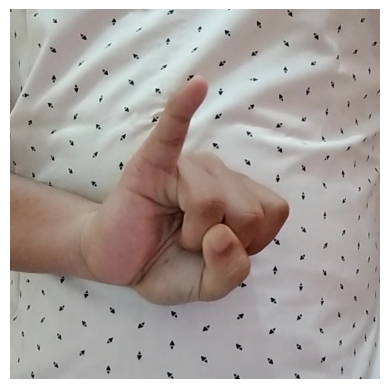

Hand detected. Predicted sign language letter: I
1_I (1).jpg: I


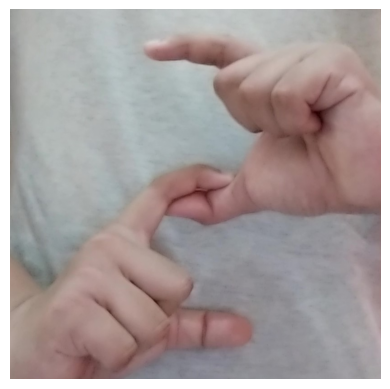

Hand detected. Predicted sign language letter: S
2_S (1).jpg: S


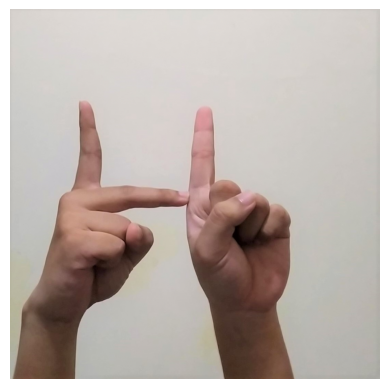

Hand detected. Predicted sign language letter: H
3_H (1).jpg: H


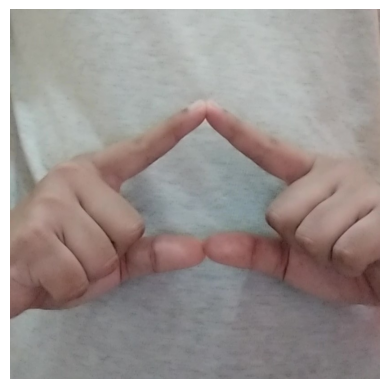

Hand detected. Predicted sign language letter: A
4_A (1).jpg: A


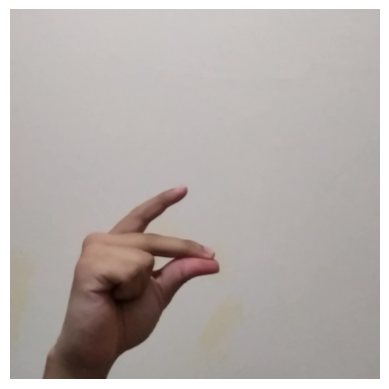

Hand detected. Predicted sign language letter: R
5_R (1).jpg: R


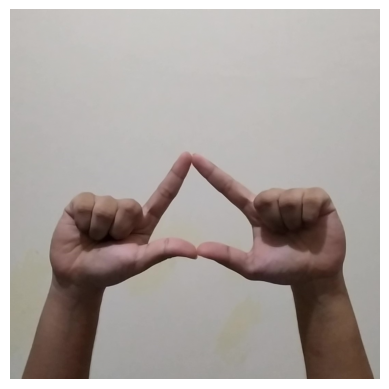

Hand detected. Predicted sign language letter: A
6_A (1).jpg: A


In [ ]:
# Upload files
uploaded = files.upload()

# Load your pre-trained model
model = load_model('./MyDrive/ISHARA/savemodel/multiclass_model.h5')  # Make sure to update this with the actual path to your model

# Assuming train_images is a dataset object or a generator that you used during training
# You need to define or load it accordingly. This is a placeholder.
# Example:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# train_datagen = ImageDataGenerator(...)
# train_images = train_datagen.flow_from_directory('your_train_data_directory', ...)

for fn in uploaded.keys():
    count = 1
    plt.subplot(3,3,count)
    plt.imshow(plt.imread(fn)/255.)
    plt.axis("off")
    plt.show()
    count+=1

    # Predicting images
    path = fn
    img = load_img(path, target_size=(224, 224))

    # Convert the image to a numpy array
    img_array = img_to_array(img)

    # Expand dimensions to match the expected input shape (1, 224, 224, 3)
    img_array = np.expand_dims(img_array, axis=0)

    # Normalize the image data
    img_array = img_array / 255.0

    # Make prediction
    pred = model.predict(img_array)
    pred = np.argmax(pred, axis=1)

    # Assuming train_images.class_indices is available
    labels = (train_images.class_indices)
    labels = dict((v, k) for k, v in labels.items())
    pred = [labels[k] for k in pred]

    print(fn)
    print(pred)